In [1]:
from buildstock_query import BuildStockQuery
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
my_run = BuildStockQuery(db_name='rescore',
                        table_name='run1',
                        workgroup='rescore',
                        buildstock_type='resstock')

INFO:buildstock_query.query_core:Loading run1 ...
INFO:botocore.tokens:Loading cached SSO token for nrel
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:buildstock_query.main:Getting Success counts...
INFO:botocore.tokens:Loading cached SSO token for nrel
INFO:buildstock_query.report_query:Checking integrity with ts_tables ...


         success  unapplicable  fail   Sum
upgrade                                   
0           7502             0     0  7502
Annual and timeseries tables are verified to have the same number of buildings.


INFO:buildstock_query.query_core:3 queries cache saved to .bsq_cache\run1_query_cache.pkl


All buildings are verified to have the same number of (8760) timeseries rows.


In [5]:
ts_agg = my_run.agg.aggregate_timeseries(enduses=['end_use__electricity__pv__kwh'],
                                         timestamp_grouping_func='month')
ts_agg

,time,sample_count,units_count,rows_per_sample,end_use__electricity__pv__kwh
0,2018-01-01,7502,556937.0,744,-5.441169e+07
1,2018-02-01,7502,556937.0,672,-4.299999e+07
2,2018-03-01,7502,556937.0,744,-5.214585e+07
3,2018-04-01,7502,556937.0,720,-5.085794e+07
4,2018-05-01,7502,556937.0,744,-6.063564e+07
5,2018-06-01,7502,556937.0,720,-7.088925e+07
6,2018-07-01,7502,556937.0,744,-6.594686e+07
7,2018-08-01,7502,556937.0,744,-5.922860e+07
8,2018-09-01,7502,556937.0,720,-6.238223e+07
9,2018-10-01,7502,556937.0,744,-5.489883e+07


In [20]:
resstock_mwh = (-ts_agg['end_use__electricity__pv__kwh']/1000).tolist()
EIA_mwh = [45190.08,43539.39,52596.27,54781.39,57852.08,58653.12,59226.94,57399.03,53436.94,49638.17,43688.12,44037.32]
EIA_mwh_refactor_471934_customer = [i/436257*471934 for i in EIA_mwh]

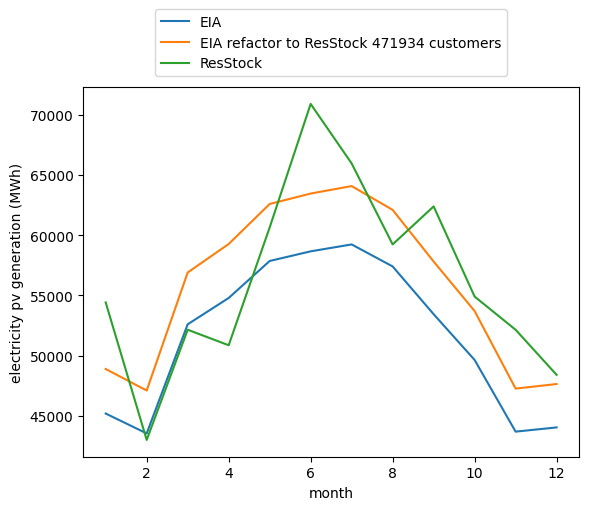

In [30]:
month = [i for i in range(1, 13)]

plt.plot(month, EIA_mwh, label = "EIA")
plt.plot(month, EIA_mwh_refactor_471934_customer, label = "EIA refactor to ResStock 471934 customers")
plt.plot(month, resstock_mwh, label = "ResStock")
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.23))
plt.xlabel("month")
plt.ylabel("electricity pv generation (MWh)")
plt.show()